In [9]:
import pandas as pd
import numpy as np
df = pd.read_csv('./candidates_camp1DD.csv', skiprows=1, header=None)
df.head()

,0,1,2,3,4
0,37.0,28.0,111.0,27.0,17.574541
1,93.0,26.0,156.0,24.0,20.512217
2,129.0,23.0,51.0,58.0,22.520391
3,61.0,45.0,78.0,52.0,23.864773
4,145.0,22.0,24.0,32.0,22.746913


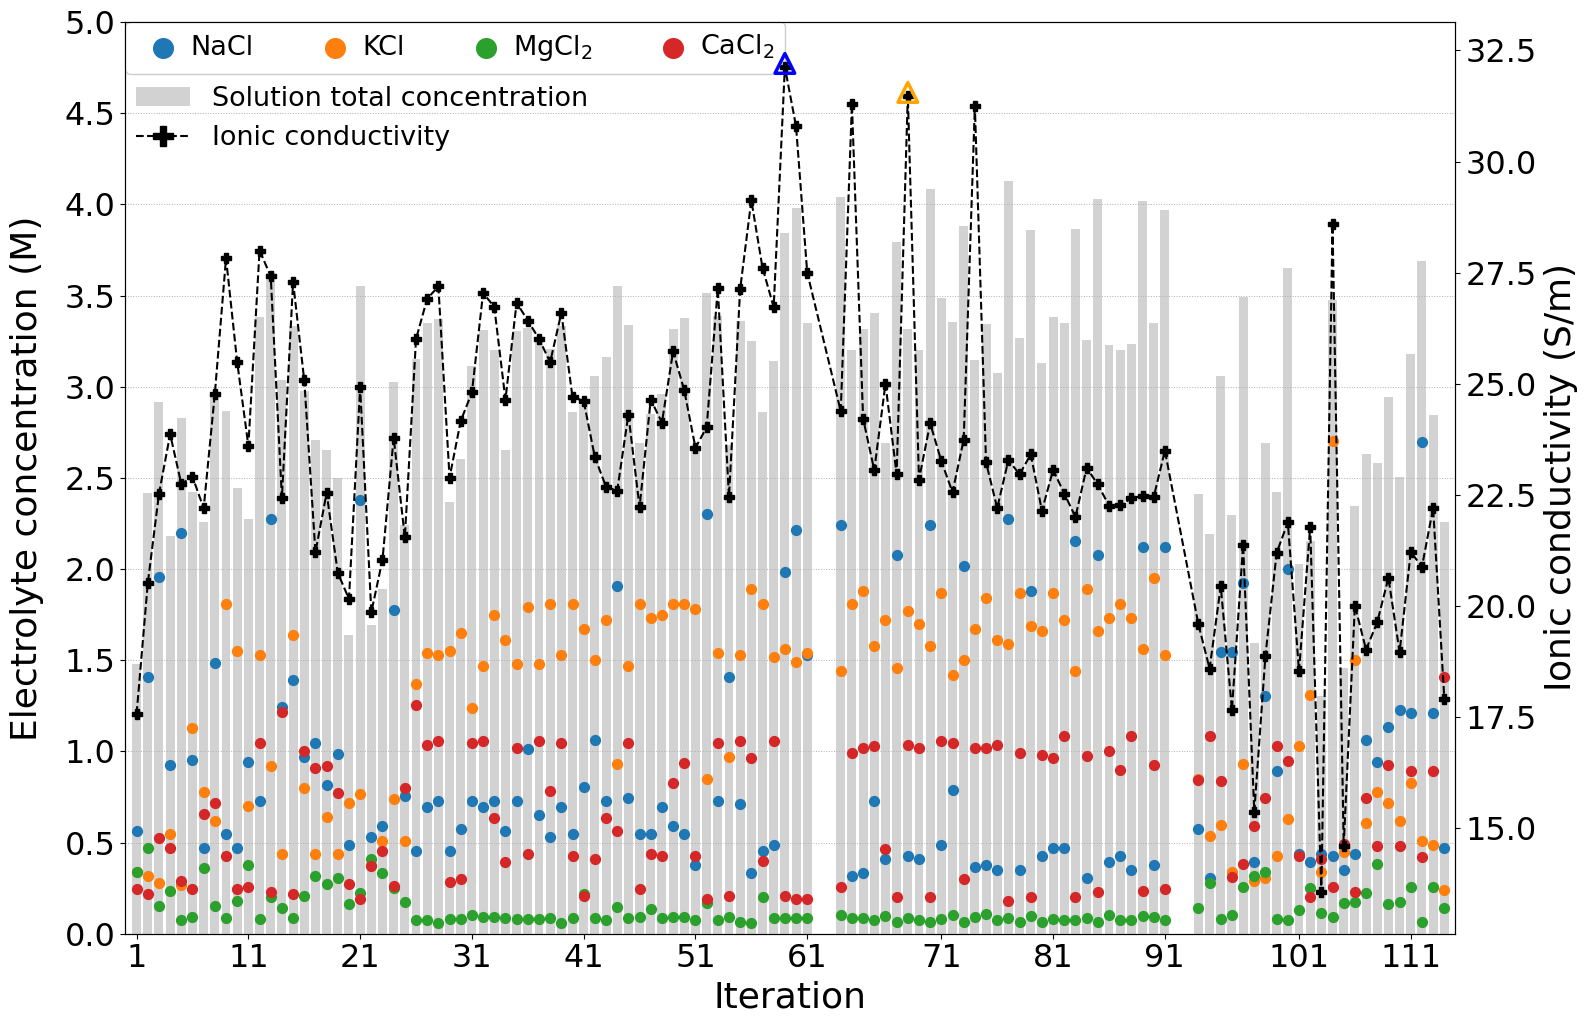

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('./candidates_camp1DD.csv', skiprows=1, header=None)

Res_Con = np.array([5, 4, 1, 3], dtype=float)
vol2rat = data.iloc[:, :4].mul(Res_Con).div(330)

column_names = ['Molar_Ratio_1', 'Molar_Ratio_2', 'Molar_Ratio_3', 'Molar_Ratio_4', 'Conductivity']
data.columns = column_names
vol2rat.columns = column_names[:4]

data['Iteration'] = np.arange(1, len(data) + 1)

gap_positions = [61, 91]
gap_width = 2
spaced_x = []

for i in range(len(data)):
    num_gaps_before = sum([i + 1 > b for b in gap_positions])
    spaced_x.append(data.loc[i, 'Iteration'] + gap_width * num_gaps_before)

data['Spaced_X'] = spaced_x

actual_names = {
    'Molar_Ratio_1': r'NaCl',
    'Molar_Ratio_2': r'KCl',
    'Molar_Ratio_3': r'MgCl$_2$',
    'Molar_Ratio_4': r'CaCl$_2$'
}

colours = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

fig, ax1 = plt.subplots(figsize=(16, 11))
labelsize = 26
legsize = 19.5
ticksize = 23


salt_handles = []
for idx, col in enumerate(vol2rat.columns):
    h = ax1.scatter(
        data['Spaced_X'],
        vol2rat[col],
        label=actual_names[col],
        color=colours[idx],
        zorder=3,
        s=50,  # size equivalent to markersize=6 (6^2)
        marker='o'
    )
    salt_handles.append(h)

vol2rat['Total_Concent'] = vol2rat.sum(axis=1)
bar_handle = ax1.bar(
    data['Spaced_X'],
    vol2rat['Total_Concent'],
    width=0.8,
    color='grey',
    alpha=0.35,
    label='Solution total concentration',
    zorder=1
)

ax1.set_xlabel('Iteration', fontsize=labelsize)
ax1.set_ylabel('Electrolyte concentration (M)', fontsize=labelsize, labelpad=15)
ax1.set_xticks(data['Spaced_X'][::10])
ax1.set_xticklabels(data['Iteration'][::10])
ax1.set_yticks(np.arange(0, vol2rat['Total_Concent'].max() + 1, 0.5))
ax1.tick_params(axis='both', labelsize=ticksize)

ax2 = ax1.twinx()
ionic_handle, = ax2.plot(
    data['Spaced_X'],
    data['Conductivity'],
    color='black',
    marker='P',
    markersize=7,
    linestyle='--',
    linewidth=1.5,
    label='Ionic conductivity',
    zorder=4
)

# Highlight Maxima
highlight_points = [(59, 'blue'), (68, 'orange')]
for it, col in highlight_points:
    i = data.index[data['Iteration'] == it][0]
    ax2.scatter(data.at[i, 'Spaced_X'], data.at[i, 'Conductivity'] + 0.08,
                edgecolors=col, facecolors='none', linewidths=2.5,
                marker='^', s=200, zorder=5, label='_nolegend_')



ax2.set_ylabel(r'Ionic conductivity ($\mathrm{S}/\mathrm{m}$)', fontsize=labelsize)
ax2.tick_params(axis='y', labelsize=ticksize)

legend_salts = ax1.legend(
    salt_handles,
    [h.get_label() for h in salt_handles],
    loc='upper left',
    bbox_to_anchor=(0, 1),
    ncol=4,
    fontsize=legsize,
    framealpha=1,
    borderaxespad=0,
    handletextpad=0.0000,
    markerscale=2,
)
ax1.add_artist(legend_salts)

legend_other = ax1.legend(
    [bar_handle, ionic_handle],
    ['Solution total concentration', 'Ionic conductivity'],
    loc='upper left',
    bbox_to_anchor=(0.00, 0.942),
    fontsize=legsize,
    framealpha=1,
    borderaxespad=0,
    markerscale=2,
    frameon=False,
)

ax1.grid(axis='y', linestyle=':', linewidth=0.7)
plt.xlim(min(data['Spaced_X']) - 1, max(data['Spaced_X']) + 1)
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()


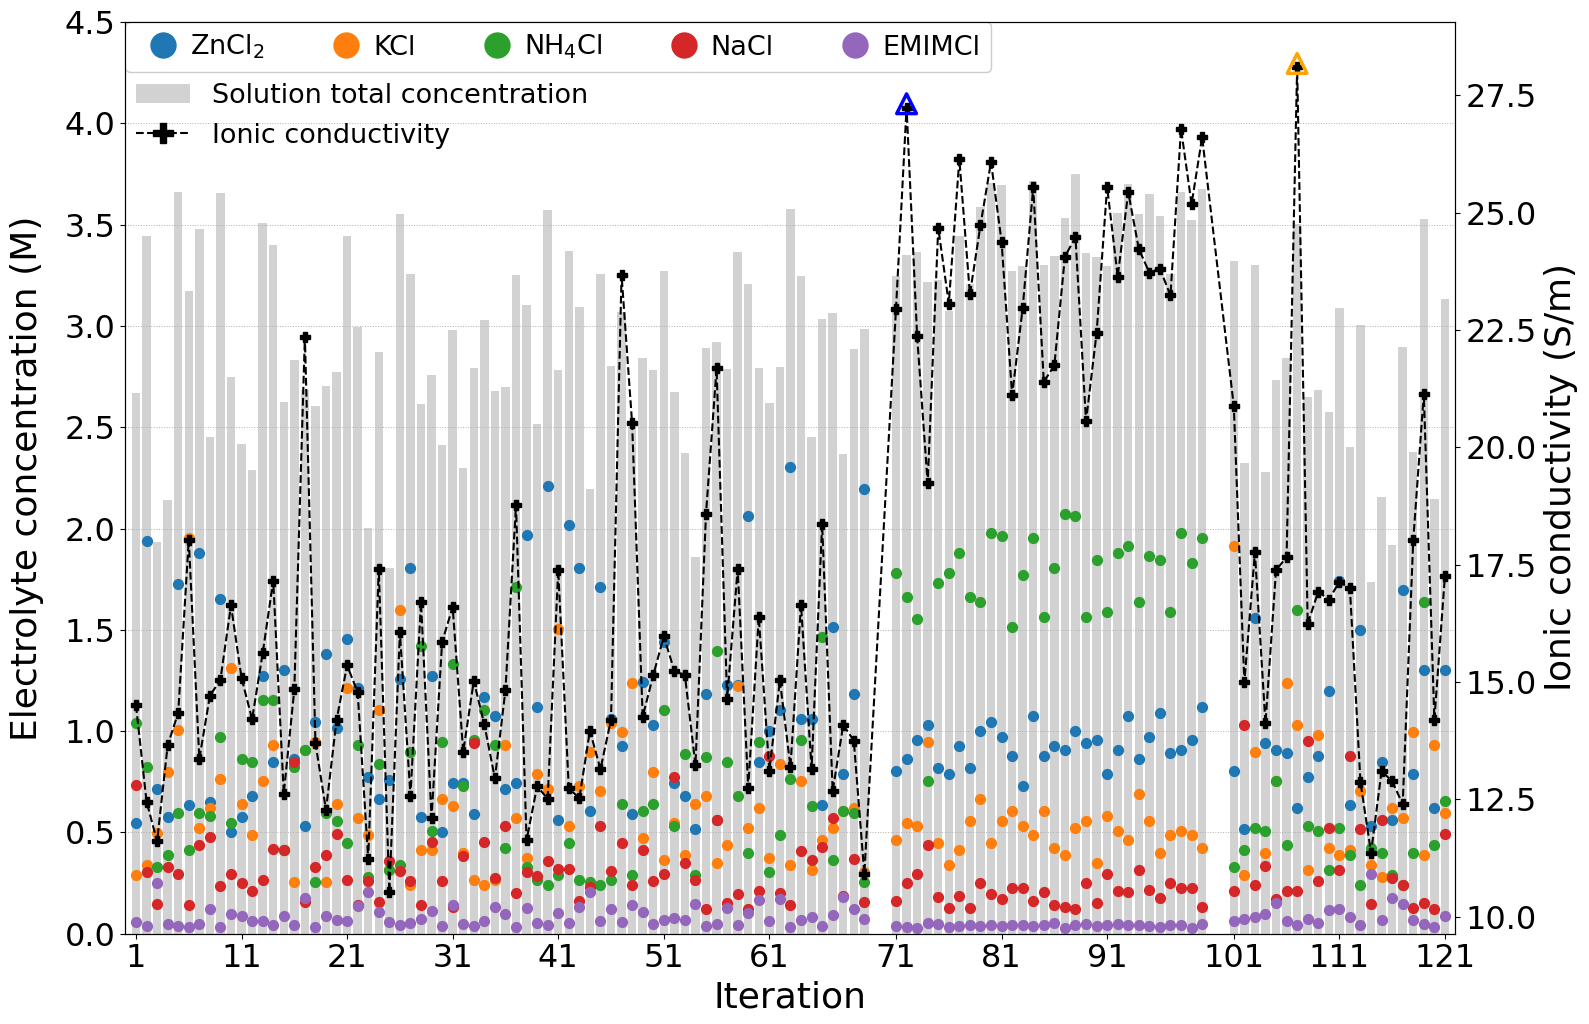

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

data = pd.read_csv('./candidates_camp2DD.csv', skiprows=1, header=None)

# Concentration speification
Res_Con = np.array([5, 4, 4, 2, 0.5], dtype=float)
vol2rat = data.iloc[:, :5].mul(Res_Con).div(330)

# Column and legend naming
column_names = ['Molar_Ratio_1', 'Molar_Ratio_2', 'Molar_Ratio_3', 'Molar_Ratio_4', 'Molar_Ratio_5', 'Conductivity']
data.columns = column_names
vol2rat.columns = column_names[:5]

# Iteration and spacing
data['Iteration'] = np.arange(1, len(data) + 1)
gap_positions = [70, 100]
gap_width = 2
spaced_x = []

for i in range(len(data)):
    num_gaps_before = sum([i + 1 > b for b in gap_positions])
    spaced_x.append(data.loc[i, 'Iteration'] + gap_width * num_gaps_before)

data['Spaced_X'] = spaced_x

# Salt names and colours
actual_names = {
    'Molar_Ratio_1': r'ZnCl$_2$',
    'Molar_Ratio_2': r'KCl',
    'Molar_Ratio_3': r'NH$_4$Cl',
    'Molar_Ratio_4': r'NaCl',
    'Molar_Ratio_5': r'EMIMCl'
}

colours = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Plotting
fig, ax1 = plt.subplots(figsize=(16, 11))
labelsize = 26
legsize = 19.5
ticksize = 23

# Scatter plots for salts
salt_handles = []
for idx, col in enumerate(vol2rat.columns):
    h = ax1.scatter(
        data['Spaced_X'],
        vol2rat[col],
        label=actual_names[col],
        color=colours[idx],
        zorder=3,
        s=50,
        marker='o'
    )
    salt_handles.append(h)

# Grey bars for total concentration
vol2rat['Total_Concent'] = vol2rat.sum(axis=1)
bar_handle = ax1.bar(
    data['Spaced_X'],
    vol2rat['Total_Concent'],
    width=0.8,
    color='grey',
    alpha=0.35,
    label='Solution total concentration',
    zorder=1
)

# Axis 1 labels and ticks
ax1.set_xlabel('Iteration', fontsize=labelsize)
ax1.set_ylabel('Electrolyte concentration (M)', fontsize=labelsize, labelpad=15)
ax1.set_xticks(data['Spaced_X'][::10])
ax1.set_xticklabels(data['Iteration'][::10])
ax1.set_yticks(np.arange(0, vol2rat['Total_Concent'].max() + 1, 0.5))
ax1.tick_params(axis='both', labelsize=ticksize)

# Plot conductivity line on secondary axis
ax2 = ax1.twinx()
ionic_handle, = ax2.plot(
    data['Spaced_X'],
    data['Conductivity'],
    color='black',
    marker='P',
    markersize=7,
    linestyle='--',
    linewidth=1.5,
    label='Ionic conductivity',
    zorder=4
)

# Highlight two conductivity points
highlight_points = [(72, 'blue'), (107, 'orange')]
for it, col in highlight_points:
    i = data.index[data['Iteration'] == it][0]
    ax2.scatter(data.at[i, 'Spaced_X'], data.at[i, 'Conductivity']+0.08,
                edgecolors=col, facecolors='none', linewidths=2.5,
                marker='^', s=200, zorder=5, label='_nolegend_')

ax2.set_ylabel(r'Ionic conductivity ($\mathrm{S}/\mathrm{m}$)', fontsize=labelsize)
ax2.tick_params(axis='y', labelsize=ticksize)

# Manual legend for salts
custom_salt_legend = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=colours[i], markersize=10, label=actual_names[col])
    for i, col in enumerate(column_names[:5])
]

legend_salts = ax1.legend(
    handles=custom_salt_legend,
    loc='upper left',
    bbox_to_anchor=(0.0, 1),
    ncol=5,
    fontsize=legsize,
    framealpha=1,
    handletextpad=0.0,
    borderaxespad=0,
    markerscale=2,
)

# Legend for bars and conductivity
legend_other = ax1.legend(
    [bar_handle, ionic_handle],
    ['Solution total concentration', 'Ionic conductivity'],
    loc='upper left',
    bbox_to_anchor=(0.0, 0.945),
    fontsize=legsize,
    framealpha=1,
    borderaxespad=0,
    markerscale=2,
    frameon=False,
)

ax1.add_artist(legend_salts)
ax1.grid(axis='y', linestyle=':', linewidth=0.7)
plt.xlim(min(data['Spaced_X']) - 1, max(data['Spaced_X']) + 1)
plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()


## Plot 4: Individual Salt Ratio

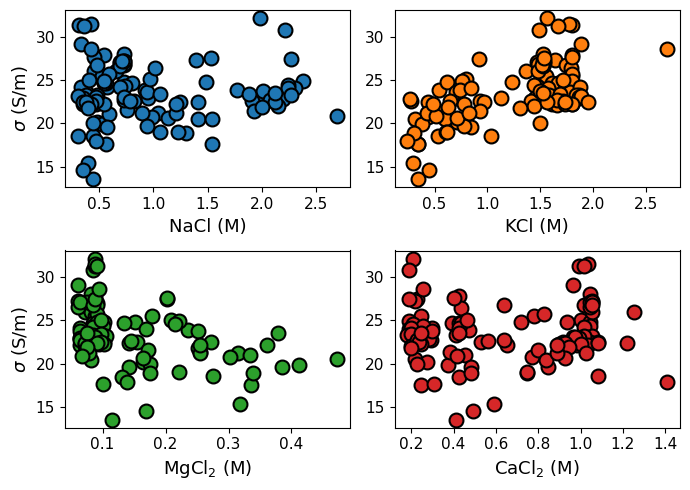

In [ ]:
# Plotting the relationship between each molar ratio and electrical conductivity
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

data = pd.read_csv('./candidates_camp1DD.csv', skiprows=1, header=None)
fig, axs = plt.subplots(2, 2, figsize=(7, 5))

column_names = ['Molar_Ratio_1', 'Molar_Ratio_2', 'Molar_Ratio_3', 'Molar_Ratio_4', 'Conductivity']
Res_Con = [5, 4, 1, 3]
vol2rat = data.iloc[:, 0:4].apply(lambda row: Res_Con * row / 330, axis=1)
data.columns = column_names
vol2rat.columns = column_names[:4]


actual_names = {
    'Molar_Ratio_1': r'NaCl',
    'Molar_Ratio_2': r'KCl',
    'Molar_Ratio_3': r'MgCl$_2$',
    'Molar_Ratio_4': r'CaCl$_2$',
}
colours = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Reshape axs to a 1D array for easier indexing
axs = axs.flatten()

labelsize = 13
ticksize = 11
legsize = 10
ma_balls = 100

# Molar Ratio 1 (NaCl) vs BO_Output
axs[0].scatter(vol2rat['Molar_Ratio_1'], data['Conductivity'], color=colours[0], s=ma_balls, edgecolors='black', linewidths=1.5)
axs[0].set_xlabel('NaCl (M)', fontsize=labelsize)
axs[0].set_ylabel(r'$\sigma$ ($\mathrm{S}/\mathrm{m}$)', fontsize=labelsize)

# Molar Ratio 2 (KCl) vs BO_Output
axs[1].scatter(vol2rat['Molar_Ratio_2'], data['Conductivity'], color=colours[1], s=ma_balls, edgecolors='black', linewidths=1.5)
axs[1].set_xlabel('KCl (M)', fontsize=labelsize)

# Molar Ratio 3 (MgCl2) vs BO_Output
axs[2].scatter(vol2rat['Molar_Ratio_3'], data['Conductivity'], color=colours[2], s=ma_balls, edgecolors='black', linewidths=1.5)
axs[2].set_xlabel(r'MgCl$_2$ (M)', fontsize=labelsize)
axs[2].set_ylabel(r'$\sigma$ ($\mathrm{S}/\mathrm{m}$)', fontsize=labelsize)


# Molar Ratio 4 (CaCl2) vs BO_Output
axs[3].scatter(vol2rat['Molar_Ratio_4'], data['Conductivity'], color=colours[3], s=ma_balls, edgecolors='black', linewidths=1.5)
axs[3].set_xlabel(r'CaCl$_2$ (M)', fontsize=labelsize)

axs[0].xaxis.set_major_locator(ticker.MultipleLocator(0.5))
axs[1].xaxis.set_major_locator(ticker.MultipleLocator(0.5))
axs[2].xaxis.set_major_locator(ticker.MultipleLocator(0.1))
axs[3].xaxis.set_major_locator(ticker.MultipleLocator(0.2))

for ax in axs:
    ax.tick_params(axis='both', labelsize=ticksize)

plt.tight_layout()
plt.show()


In [69]:
print(data.index)
print(vol2rat.index)

RangeIndex(start=0, stop=50, step=1)
RangeIndex(start=0, stop=50, step=1)


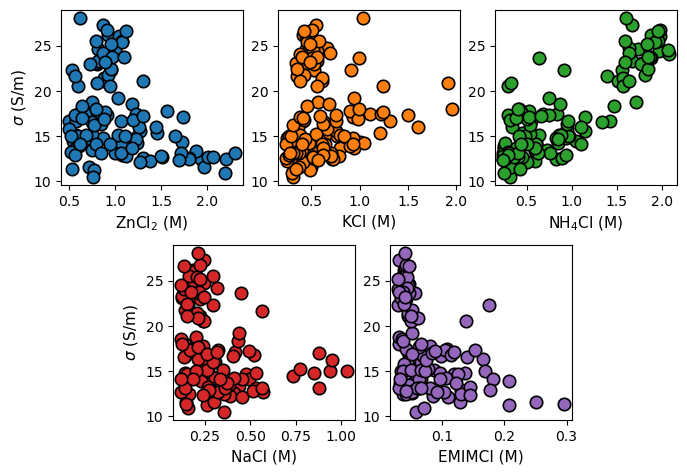

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np


data = pd.read_csv('./candidates_camp2DD.csv', skiprows=1, header=None)
column_names = ['Molar_Ratio_1', 'Molar_Ratio_2', 'Molar_Ratio_3', 'Molar_Ratio_4', 'Molar_Ratio_5', 'Conductivity']
Res_Con = np.array([5, 4, 4, 2, 0.5])
vol2rat = data.iloc[:, 0:5].mul(Res_Con).div(330)

data.columns = column_names
vol2rat.columns = column_names[:5]

actual_names = {
    'Molar_Ratio_1': r'ZnCl$_2$',
    'Molar_Ratio_2': r'KCl',
    'Molar_Ratio_3': r'NH$_4$Cl',
    'Molar_Ratio_4': r'NaCl',
    'Molar_Ratio_5': r'EMIMCl',
}
colours = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

fig = plt.figure(figsize=(7, 5))
labelsize = 11
ticksize = 10
ma_balls = 80

# Create axes manually with nice visual balance
positions = [
    [0.06, 0.55, 0.26, 0.35],  # ax0
    [0.37, 0.55, 0.26, 0.35],  # ax1
    [0.68, 0.55, 0.26, 0.35],  # ax2
    [0.22, 0.08, 0.26, 0.35],  # ax3 (center left)
    [0.53, 0.08, 0.26, 0.35],  # ax4 (center right)
]

axs = [fig.add_axes(pos) for pos in positions]

# Plot each variable
for i, col in enumerate(vol2rat.columns):
    axs[i].scatter(vol2rat[col], data['Conductivity'], color=colours[i],
                   s=ma_balls, edgecolors='black', linewidths=1.2)
    axs[i].set_xlabel(f'{actual_names[col]} (M)', fontsize=labelsize)
    if i in [0, 3]:  # left-most plots
        axs[i].set_ylabel(r'$\sigma$ ($\mathrm{S}/\mathrm{m}$)', fontsize=labelsize)

    # Adaptive tick spacing
    rng = vol2rat[col].max() - vol2rat[col].min()
    if rng < 0.5:
        axs[i].xaxis.set_major_locator(ticker.MultipleLocator(0.1))
    elif rng < 1.5:
        axs[i].xaxis.set_major_locator(ticker.MultipleLocator(0.25))
    else:
        axs[i].xaxis.set_major_locator(ticker.MultipleLocator(0.5))

    axs[i].tick_params(axis='both', labelsize=ticksize)

plt.show()
